In [33]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144
matplotlib.rcParams['figure.figsize'] = (10,7)
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['lines.markersize'] = 15
import numpy as np

# Trivial linear model

Predict the cost of n bottle of water knowing that 1 bottle costs 0.5 euro
$$y=0.5\times x$$

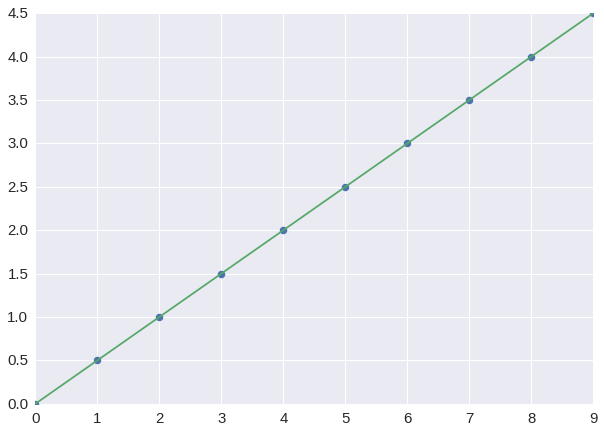

In [61]:
def model(n_bottle,beta = 0.5):
    return beta*n_bottle

X = range(0,10)
Y = [model(x) for x in X]

plt.plot(X, Y, '.')
plt.plot(X, Y, '-')
    

# Optimistic real model

The phenomenon $y$ depends linearly from the variable $x$ and has a dependence on other variables that can be modelled as a gaussian deviation from the linear dependence on $x$
$$y = 0.5 \times x +Gauss(\,\mu = 0, \theta \ll 0.5 \times x)\,$$

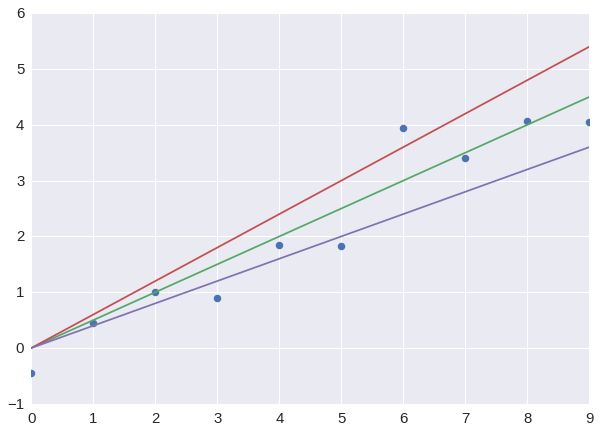

In [62]:
import random

def model_gaus(n_bottle):
    return 0.5*n_bottle + random.gauss(0, 0.5)

X = range(0,10)
Y_gauss = [model_gaus(x) for x in X]
Y_06 = [model(x,0.6) for x in X]
Y_04 = [model(x,0.4) for x in X]

plt.plot(X, Y_gauss, '.')
plt.plot(X, Y, '-')
plt.plot(X, Y_06, '-')
plt.plot(X, Y_04, '-')

SS lin: 1.89097790166
SS pol: 1.1198876732e-11


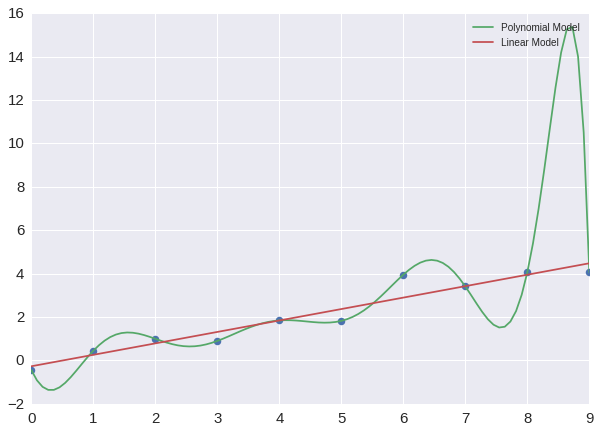

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

model = Pipeline([('poly', PolynomialFeatures(degree=10)),
                  ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(np.array(X)[:, np.newaxis], np.array(Y_gauss))

lin_mod = LinearRegression(fit_intercept=True)
lin_mod = lin_mod.fit(np.array(X)[:, np.newaxis], np.array(Y_gauss))

x_line = np.linspace(0,9,100)
polycurve = model.predict(x_line[:, np.newaxis])
lincurve  = lin_mod.predict(x_line[:, np.newaxis])

res_poly = (model.predict(np.array(X)[:, np.newaxis]) - np.array(Y_gauss))**2
res_lin = (lin_mod.predict(np.array(X)[:, np.newaxis]) - np.array(Y_gauss))**2

print "SS lin:",res_lin.sum()
print "SS pol:",res_poly.sum()


plt.plot(X, Y_gauss, '.')
# plt.plot(X, Y, '-',label = "True model")
plt.plot(x_line,polycurve, '-',label = "Polynomial Model")
plt.plot(x_line,lincurve, '-',label = "Linear Model")
plt.legend()

SS lin: 1.03280807583
SS pol: 2.2987640915


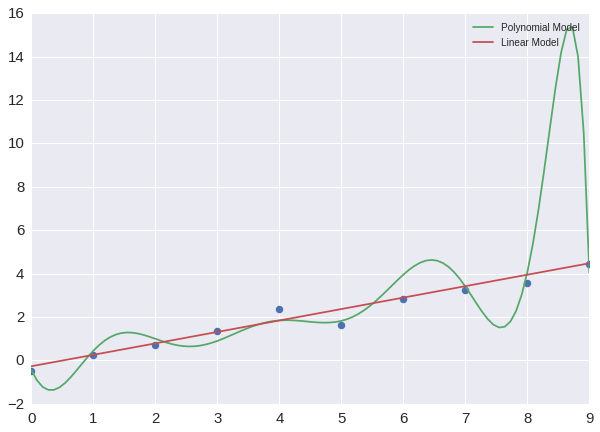

In [83]:
random.seed(10)
Y_gauss_2 = [model_gaus(x) for x in X]

res_poly = (model.predict(np.array(X)[:, np.newaxis]) - np.array(Y_gauss_2))**2
res_lin = (lin_mod.predict(np.array(X)[:, np.newaxis]) - np.array(Y_gauss_2))**2

print "SS lin:",res_lin.sum()
print "SS pol:",res_poly.sum()

plt.plot(X, Y_gauss_2, '.')
# plt.plot(X, Y, '-',label = "True model")
plt.plot(x_line,polycurve, '-',label = "Polynomial Model")
plt.plot(x_line,lincurve, '-',label = "Linear Model")
plt.legend()


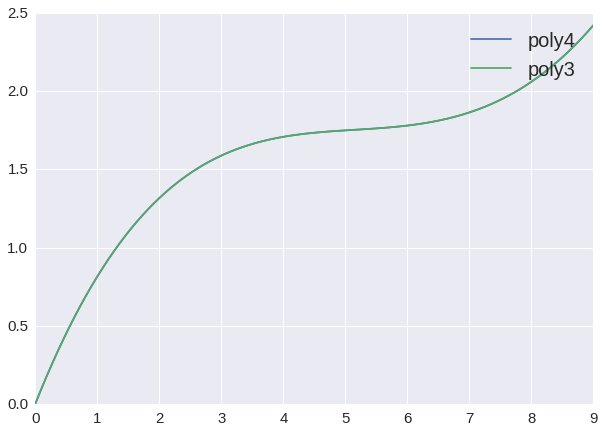

In [135]:
random.seed(1)
def true_poly_function(x):
    return x-0.2*x**2+0.015*x**3-0.0002*x**4

def true_poly_function3(x):
    return x-0.2*x**2+0.015*x**3

def make_ds(x):
    return true_poly_function(x)+ random.gauss(0, 0.2)

x_line = np.linspace(0,9,100)
polycurve = true_poly_function(x_line)
poly3 = true_poly_function(x_line)

ds_x = np.linspace(0,9,20)
ds_y = [make_ds(x) for x in ds_x]
ds_y_test = [make_ds(x) for x in ds_x]

plt.plot(x_line,polycurve, '-',label = 'poly4')
plt.plot(x_line,poly3, '-',label = 'poly3')
# plt.plot(ds_x,ds_y, '.',label = 'Training')
# plt.plot(ds_x,ds_y_test, '.',label = 'Test', c = 'red')
plt.legend(prop={'size':20})


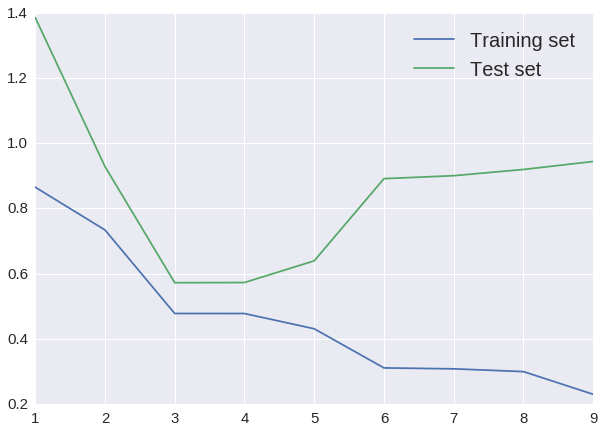

In [134]:
degrees = range(1,10)
ss = []
ss_test = []

for deg in degrees:
    model = Pipeline([('poly', PolynomialFeatures(degree=deg)),
                  ('linear', LinearRegression(fit_intercept=False))])
    
    model = model.fit(np.array(ds_x)[:, np.newaxis], np.array(ds_y))
    res_poly = (model.predict(np.array(ds_x)[:, np.newaxis]) - np.array(ds_y))**2
    res_poly_test = (model.predict(np.array(ds_x)[:, np.newaxis]) - np.array(ds_y_test))**2
    
    ss.append(res_poly.sum())
    ss_test.append(res_poly_test.sum())

np.array(degrees).shape,np.array(ss).shape,ds_x.shape,len(ds_y)

plt.plot(degrees,ss, '-',label = 'Training set')
plt.plot(degrees,ss_test, '-', label = 'Test set')

plt.legend(prop={'size':20})